In [14]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
df = pd.read_csv(r"C:\Users\MayankKoundal\Documents\Datasets\Moodys.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')



In [19]:
df.set_index ('Date', inplace = True) 

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400
1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200
1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800
1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800
1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400
...,...,...,...,...,...,...
2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400
2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200
2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500


In [21]:
df.isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-11-01,False,False,False,False,False,False
1994-11-02,False,False,False,False,False,False
1994-11-03,False,False,False,False,False,False
1994-11-04,False,False,False,False,False,False
1994-11-07,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-04-04,False,False,False,False,False,False
2023-04-05,False,False,False,False,False,False
2023-04-06,False,False,False,False,False,False


In [22]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [64]:


df.index[0].day_name()


'Tuesday'

In [36]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return',
       'SMA_50', 'SMA_200'],
      dtype='object')

In [61]:
#df['day'] = df['Date'].dt.day_name()

df['day'] = df.index.day_name()


In [62]:
df

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,SMA_50,SMA_200,day
Date,,,,,,,,,,
1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400,NaN,NaN,NaN,Tuesday
1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200,-0.007576,NaN,NaN,Wednesday
1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800,0.000000,NaN,NaN,Thursday
1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800,-0.007634,NaN,NaN,Friday
1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400,-0.007692,NaN,NaN,Monday
...,...,...,...,...,...,...,...,...,...,...
2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400,-0.001183,302.162397,287.926049,Tuesday
2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200,-0.003586,301.912197,288.160949,Wednesday
2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500,-0.013967,301.569997,288.353749,Thursday


In [39]:
df['Date'].min()

KeyError: 'Date'

In [40]:
df['Date'].max()

KeyError: 'Date'

In [60]:
#df['Date'].max() - df['Date'].min()

date_range = df.index.max() - df.index.min()


In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,SMA_50,SMA_200
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7.160000e+03,7159.000000,7111.000000,6961.000000
mean,81.428708,82.325171,80.543896,81.459335,76.262965,1.728320e+06,0.000718,80.970312,79.508998
std,94.101423,95.075305,93.090423,94.096398,93.727654,1.826720e+06,0.020796,93.268471,90.882878
min,6.937500,7.000000,6.875000,6.937500,5.520961,0.000000e+00,-0.168478,7.331250,7.560313
25%,17.923749,18.178750,17.625000,17.963750,14.478568,7.618000e+05,-0.008195,19.089450,20.404725
50%,38.615000,39.205000,38.094999,38.645001,32.791308,1.154750e+06,0.000000,38.227600,38.382900
75%,100.977501,101.860001,100.139997,101.082500,94.003287,2.010800e+06,0.009954,100.450100,100.665000
max,407.410004,407.940002,400.299988,406.690002,401.238342,4.354560e+07,0.185717,391.988801,367.836200


In [59]:
#mask = (df['Date'] < '1995-03-03')
#df[mask]

df['1994' :'1995']['Close']

Date
1994-11-01    8.2500
1994-11-02    8.1875
1994-11-03    8.1875
1994-11-04    8.1250
1994-11-07    8.0625
               ...  
1995-12-22    8.9375
1995-12-26    9.0000
1995-12-27    9.0625
1995-12-28    9.1250
1995-12-29    9.1875
Name: Close, Length: 294, dtype: float64

In [ ]:
import seaborn as sns

# Get numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(20, 10 * len(numeric_columns)))

# Plot histograms using seaborn
for idx, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, bins=60, ax=axes[idx])

plt.tight_layout()
plt.show()


KeyError: "None of [DatetimeIndex(['1994-11-01', '1994-11-02', '1994-11-03', '1994-11-04',\n               '1994-11-07', '1994-11-08', '1994-11-09', '1994-11-10',\n               '1994-11-11', '1994-11-14',\n               ...\n               '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31',\n               '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06',\n               '2023-04-10', '2023-04-11'],\n              dtype='datetime64[ns]', name='Date', length=7160, freq=None)] are in the [columns]"

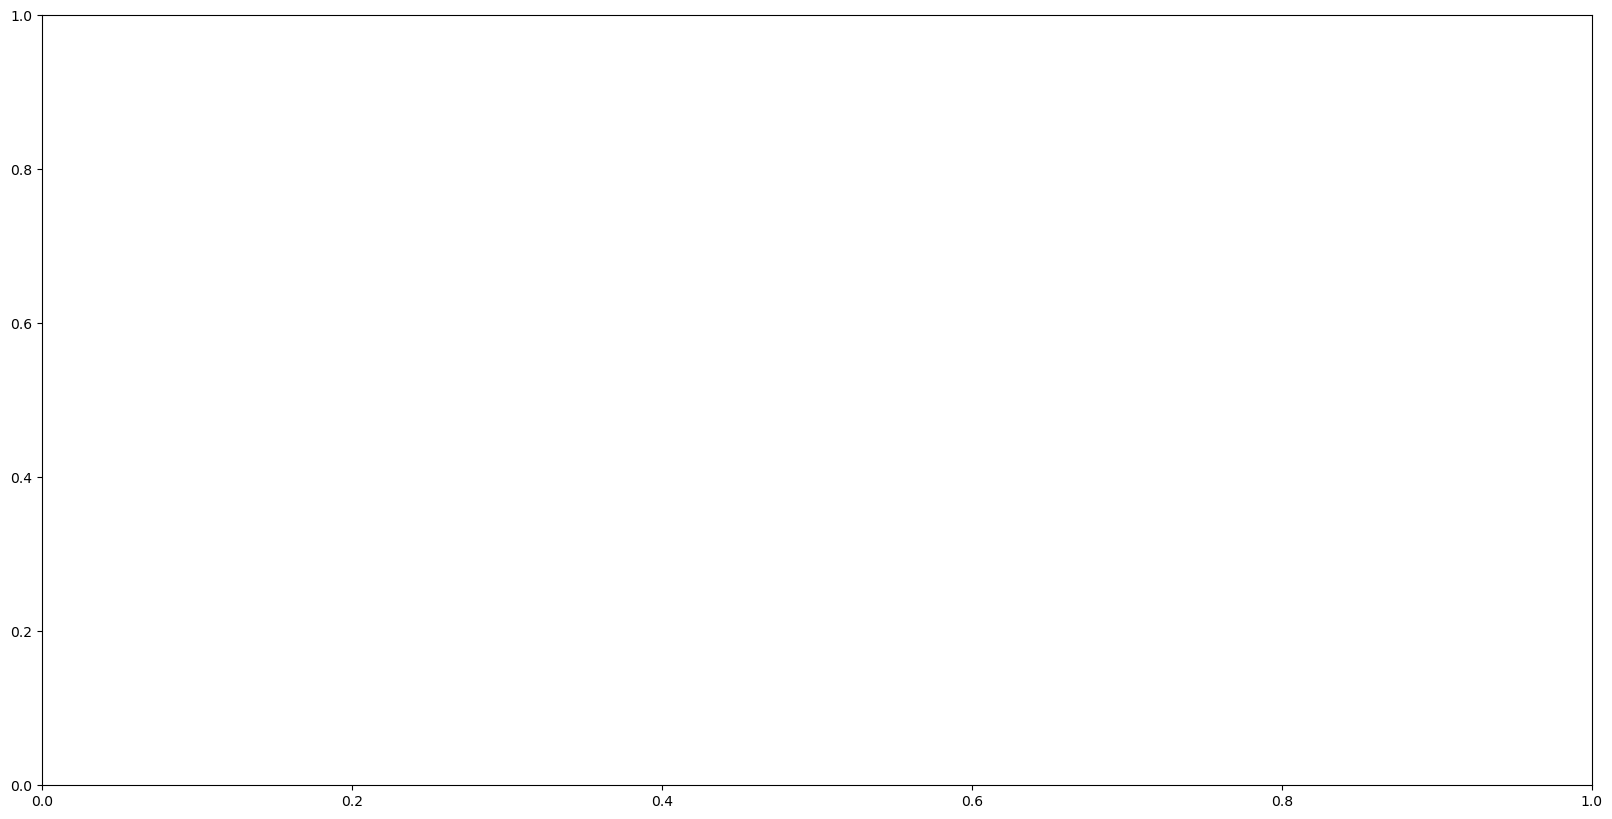

In [65]:
df.plot(kind='scatter', x=df.index, y='Volume', figsize=(20, 10))
plt.show()


<Axes: >

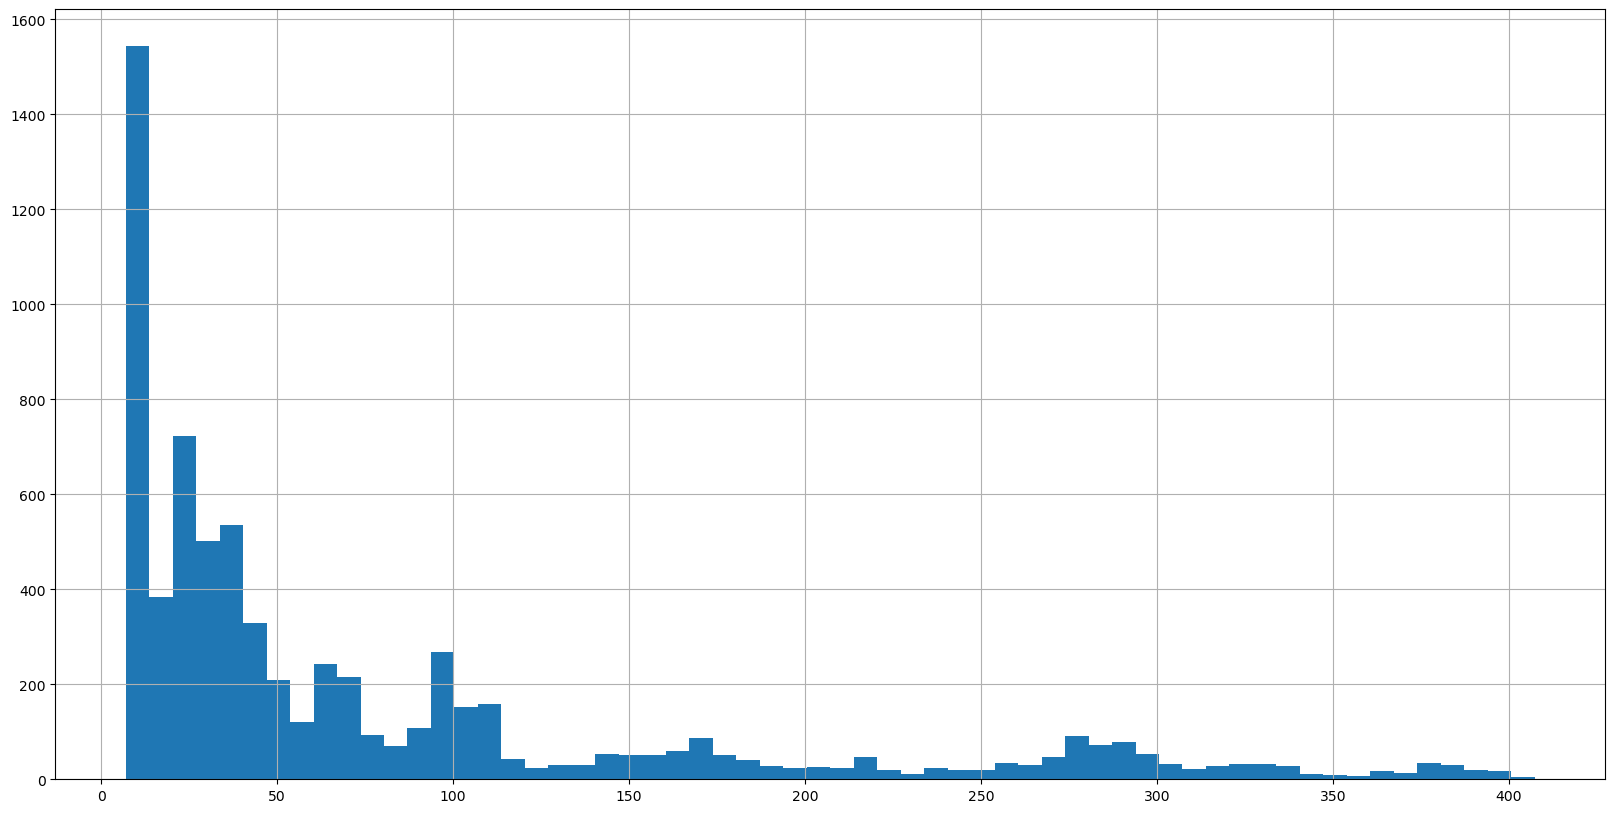

In [47]:
df['Open'].hist(bins=60 , figsize = (20,10))

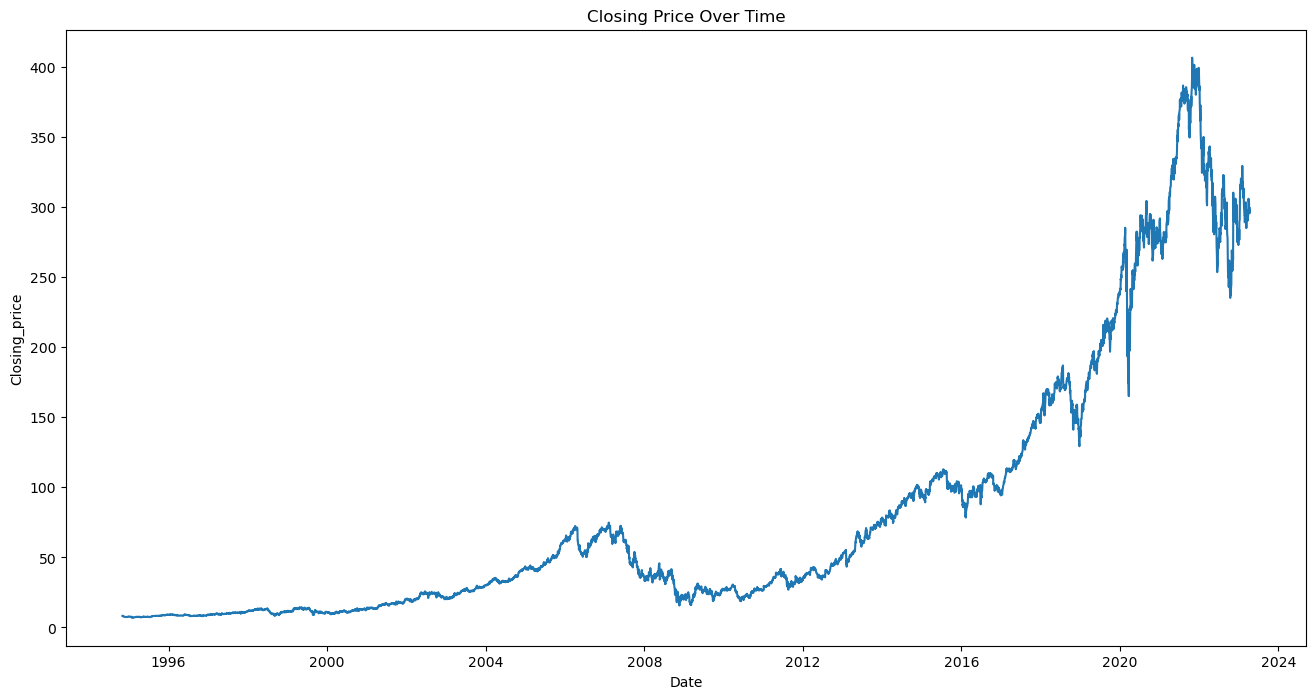

In [48]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Over Time')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing_price')
plt.show()

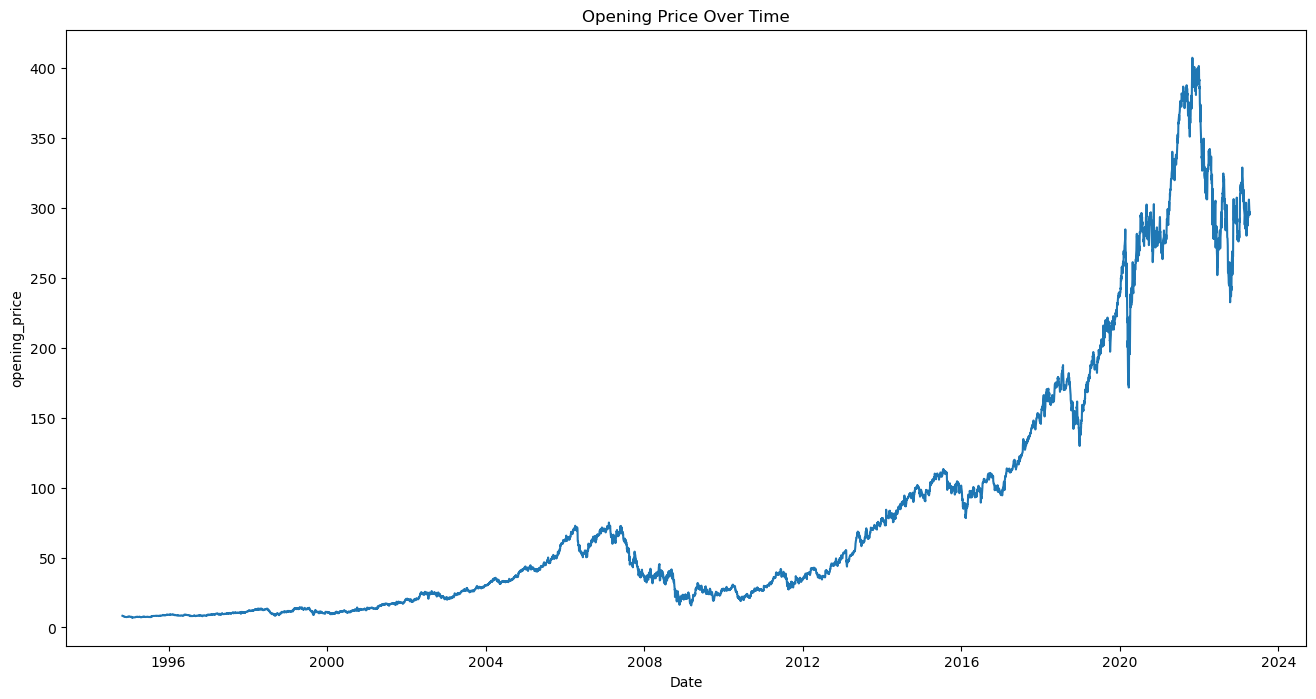

In [49]:
plt.figure(figsize=(16,8))
plt.title('Opening Price Over Time')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('opening_price')
plt.show()

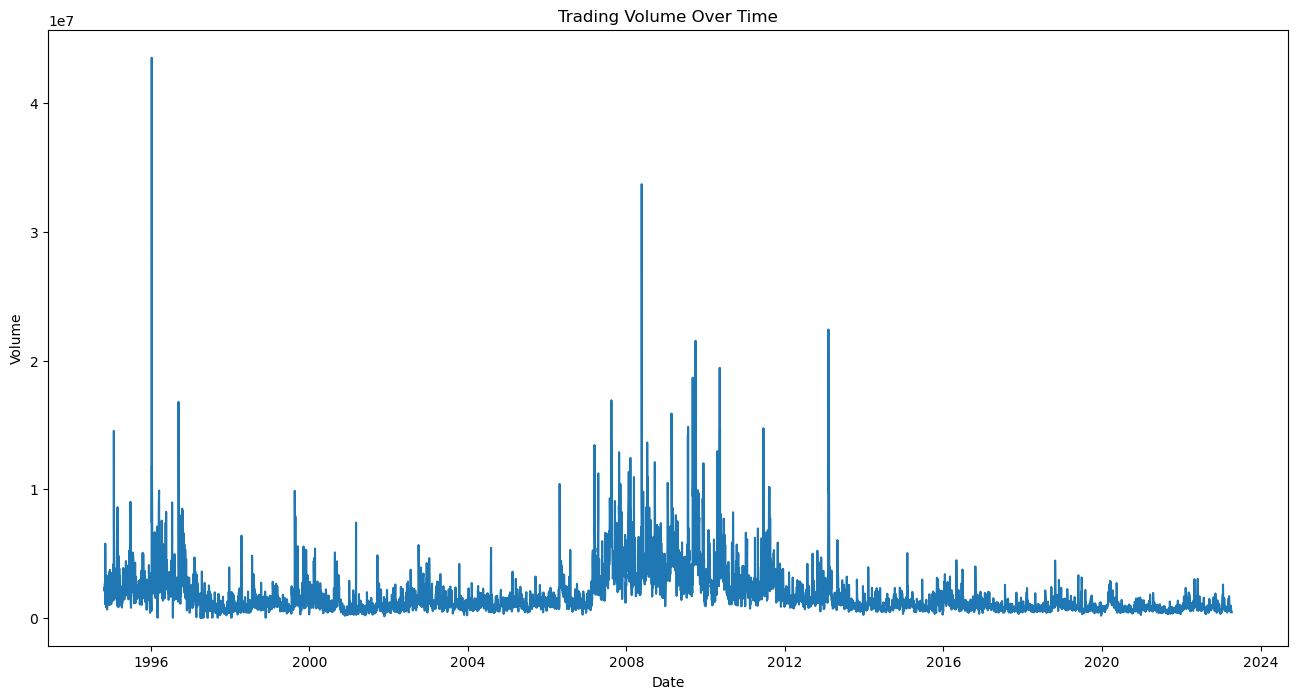

In [50]:
plt.figure(figsize=(16,8))
plt.title('Trading Volume Over Time')
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [51]:
df['Daily_Return'] = df['Close'].pct_change()


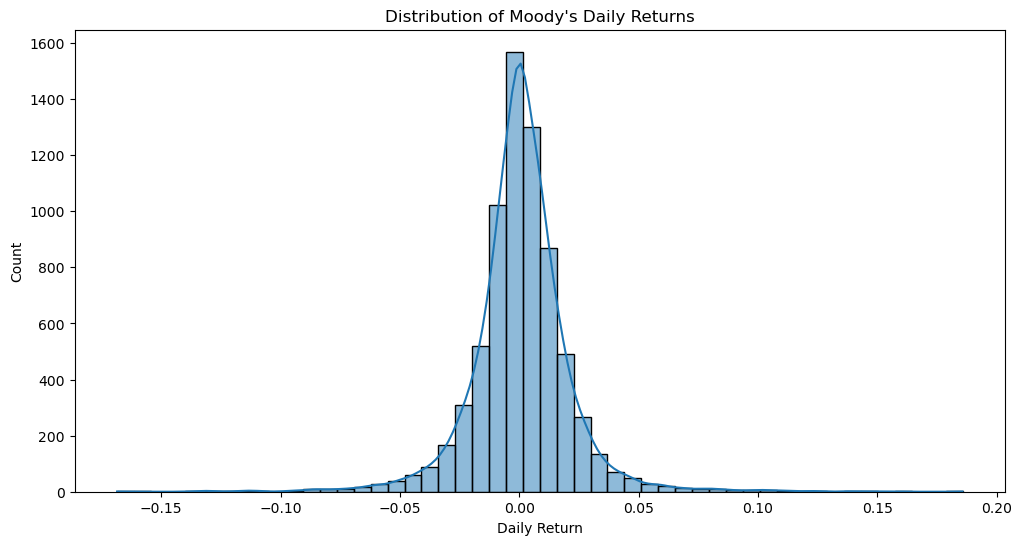

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=50)
plt.title('Distribution of Moody\'s Daily Returns')
plt.xlabel('Daily Return')
plt.show()


In [53]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()


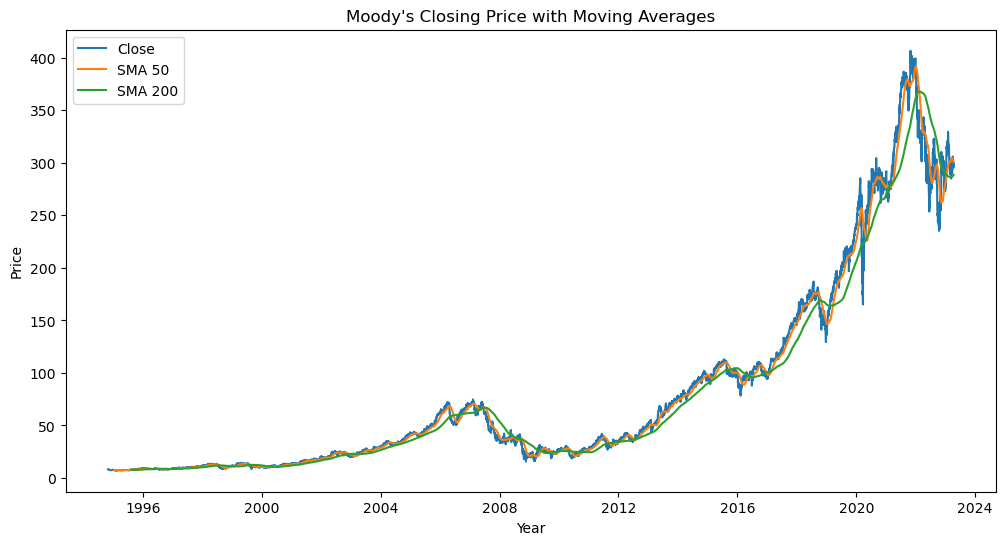

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_50'], label='SMA 50')
plt.plot(df['SMA_200'], label='SMA 200')
plt.title('Moody\'s Closing Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()



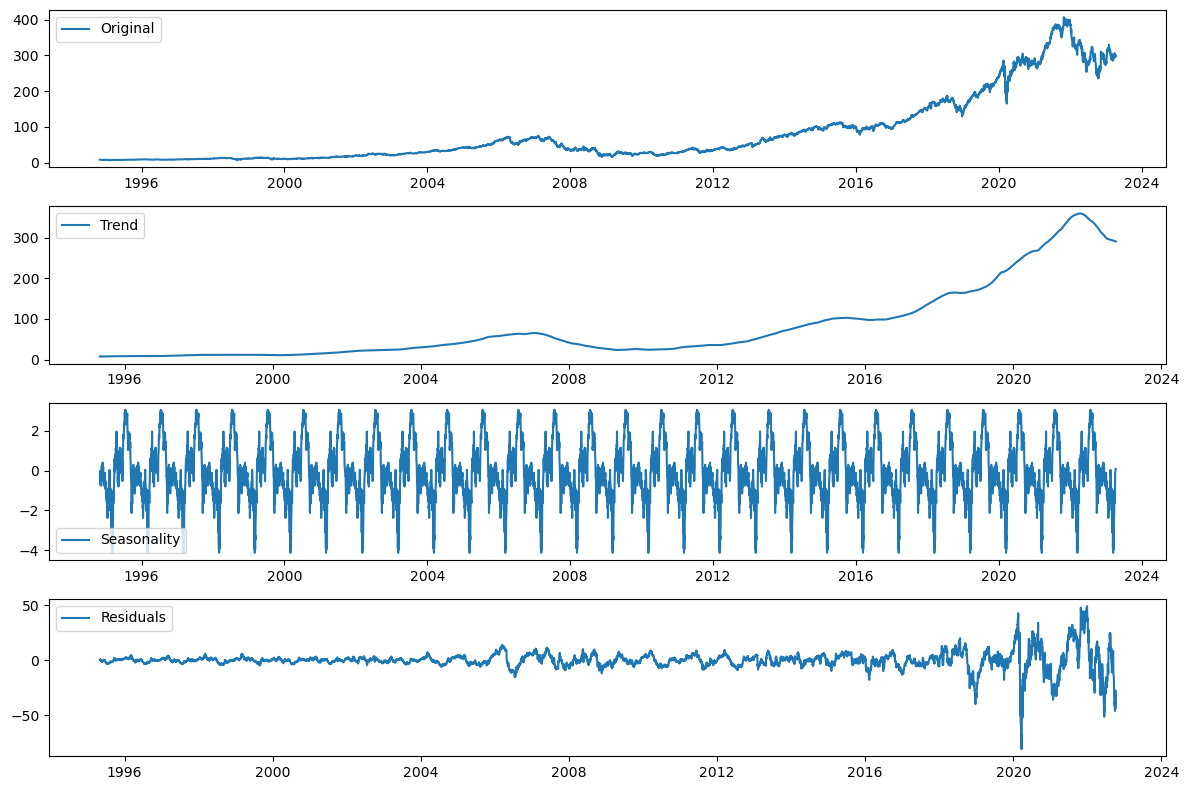

In [55]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()


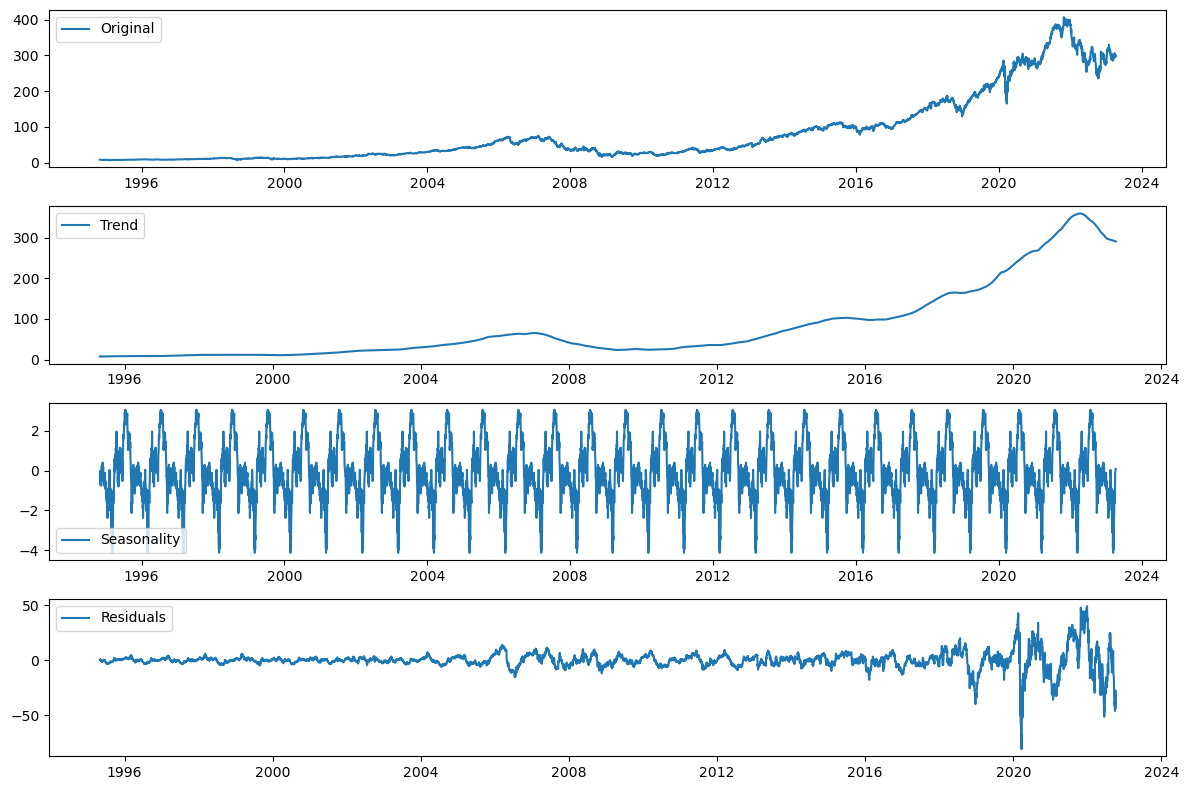

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(df['Close'], label='Original')
axes[1].plot(trend, label='Trend')
axes[2].plot(seasonal, label='Seasonality')
axes[3].plot(residual, label='Residuals')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()


In [57]:
output_file = 'output.csv'
df.to_csv(output_file, index=False)